In [5]:
import numpy
import pandas
from sklearn import linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler

In [6]:
dtype_dict=dtype = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}
houseprice_complete=pandas.read_csv('C:/Users/mhemani/AnacondaProjects/Coursera_MachineLearning/kc_house_data.csv',dtype=dtype_dict)
houseprice_train=pandas.read_csv('C:/Users/mhemani/AnacondaProjects/Coursera_MachineLearning/Week 3 Specific Datasets/wk3_kc_house_train_data.csv',dtype=dtype_dict)
houseprice_validation=pandas.read_csv('C:/Users/mhemani/AnacondaProjects/Coursera_MachineLearning/Week 3 Specific Datasets/wk3_kc_house_valid_data.csv',dtype=dtype_dict)
houseprice_validation_shuffled=pandas.read_csv('C:/Users/mhemani/AnacondaProjects/Coursera_MachineLearning/Week 3 Specific Datasets/wk3_kc_house_train_valid_shuffled.csv',dtype=dtype_dict)
houseprice_test=pandas.read_csv('C:/Users/mhemani/AnacondaProjects/Coursera_MachineLearning/Week 3 Specific Datasets/wk3_kc_house_test_data.csv',dtype=dtype_dict)
houseprice_set1=pandas.read_csv('C:/Users/mhemani/AnacondaProjects/Coursera_MachineLearning/Week 3 Specific Datasets/wk3_kc_house_set_1_data.csv',dtype=dtype_dict )
houseprice_set2=pandas.read_csv('C:/Users/mhemani/AnacondaProjects/Coursera_MachineLearning/Week 3 Specific Datasets/wk3_kc_house_set_2_data.csv',dtype=dtype_dict )
houseprice_set3=pandas.read_csv('C:/Users/mhemani/AnacondaProjects/Coursera_MachineLearning/Week 3 Specific Datasets/wk3_kc_house_set_3_data.csv',dtype=dtype_dict )
houseprice_set4=pandas.read_csv('C:/Users/mhemani/AnacondaProjects/Coursera_MachineLearning/Week 3 Specific Datasets/wk3_kc_house_set_4_data.csv',dtype=dtype_dict )

In [8]:
houseprice_complete[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','condition','grade','sqft_above','sqft_basement','sqft_living15','sqft_lot15']]

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
0,3.0,1.00,1180.0,5650,1,3,7,1180,0,1340.0,5650.0
1,3.0,2.25,2570.0,7242,2,3,7,2170,400,1690.0,7639.0
2,2.0,1.00,770.0,10000,1,3,6,770,0,2720.0,8062.0
3,4.0,3.00,1960.0,5000,1,5,7,1050,910,1360.0,5000.0
4,3.0,2.00,1680.0,8080,1,3,8,1680,0,1800.0,7503.0
5,4.0,4.50,5420.0,101930,1,3,11,3890,1530,4760.0,101930.0
6,3.0,2.25,1715.0,6819,2,3,7,1715,0,2238.0,6819.0
7,3.0,1.50,1060.0,9711,1,3,7,1060,0,1650.0,9711.0
8,3.0,1.00,1780.0,7470,1,3,7,1050,730,1780.0,8113.0
9,3.0,2.50,1890.0,6560,2,3,7,1890,0,2390.0,7570.0


In [9]:
train_features=houseprice_train[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','condition','grade','sqft_above','sqft_basement','sqft_living15','sqft_lot15']]
train_target=houseprice_train['price']
test_features=houseprice_test[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','condition','grade','sqft_above','sqft_basement','sqft_living15','sqft_lot15']]
test_target=houseprice_test['price']

In [15]:
def get_rss(input_features_train,input_target_train,output_features_test,output_target_test,method):
    if method==1:
        linear_model=lm.LinearRegression()
        linear_model.fit(X=input_features_train,y=input_target_train)
        return_variable= str(mean_squared_error(output_target_test, linear_model.predict(X=output_features_test)))
    elif method==2:
        regr_cv = RidgeCV(alphas=numpy.arange(-1000, 1000, 0.1))
        scaler = StandardScaler()
        input_features_train_std = scaler.fit_transform(input_features_train)
        model_cv = regr_cv.fit(input_features_train_std, input_target_train)
        return_variable= [str(mean_squared_error(output_target_test, model_cv.predict(X=output_features_test))),model_cv.alpha_]
    return return_variable

In [19]:
method=2
print (get_rss(train_features,train_target,test_features,test_target,method))

['1.91690125986e+17', 101.50000000025057]


In [121]:
input_variable=list(poly[15].columns.values[:-1])
input_var_train=poly1_data[input_variable]
output_var_train=poly1_data['price']
input_variable
# list(poly1_data.columns.values[:-1])

['power_1',
 'power_2',
 'power_3',
 'power_4',
 'power_5',
 'power_6',
 'power_7',
 'power_8',
 'power_9',
 'power_10',
 'power_11',
 'power_12',
 'power_13',
 'power_14',
 'power_15']

In [118]:
linear_model=lm.LinearRegression()
linear_model.fit(X=input_var_train,y=output_var_train)
print (linear_model.intercept_)
print (list(zip(linear_model.coef_, input_variable)))

506800.922578
[(2.680077893972888e-77, 'power_1'), (-1.2831222987511815e-39, 'power_2'), (-1.6486971735335461e-44, 'power_3'), (-8.0493071691289846e-50, 'power_4'), (0.0, 'power_5'), (0.0, 'power_6'), (3.6286651005819432e-55, 'power_7'), (1.498074952467487e-51, 'power_8'), (5.7397448304171821e-48, 'power_9'), (1.9515834812767321e-44, 'power_10'), (5.3789708509389057e-41, 'power_11'), (9.3803561325282581e-38, 'power_12'), (-3.624783434040523e-41, 'power_13'), (4.6396840084622148e-45, 'power_14'), (-1.9650040862752037e-49, 'power_15')]


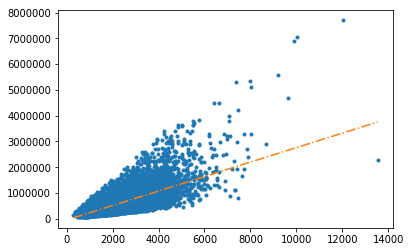

In [106]:
plt.plot(poly1_data['power_1'],poly1_data['price'],'.',
        poly1_data['power_1'], linear_model.predict(poly1_data[input_variable]),'-.')

In [113]:
input_var_test=
output_var_test=
str(mean_squared_error(output_var_test, linear_model.predict(X=input_var_test)))

'79626670612.1'